In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
# Parameters
S0 = 100  # Initial stock price
mu = 0.05  # Drift (expected return)
sigma = 0.2  # Volatility
T = 1.0  # Time horizon (1 year)
N = 252  # Number of time steps (daily for 1 year)
dt = T / N  # Time increment

In [3]:
np.random.seed(42)  # Set seed for reproducibility

# Time array
t = np.linspace(0, T, N)

# Simulate Brownian motion
dW = np.random.normal(0, np.sqrt(dt), size=N)  # Brownian increments
W = np.cumsum(dW)  # Brownian motion


In [4]:
# Simulate stock price using GBM: S(t) = S0 * exp((mu - 0.5 * sigma^2) * t + sigma * W(t))
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

In [5]:
# Calculate log returns: r(t) = log(S(t) / S(t-1))
log_returns = np.diff(np.log(S))

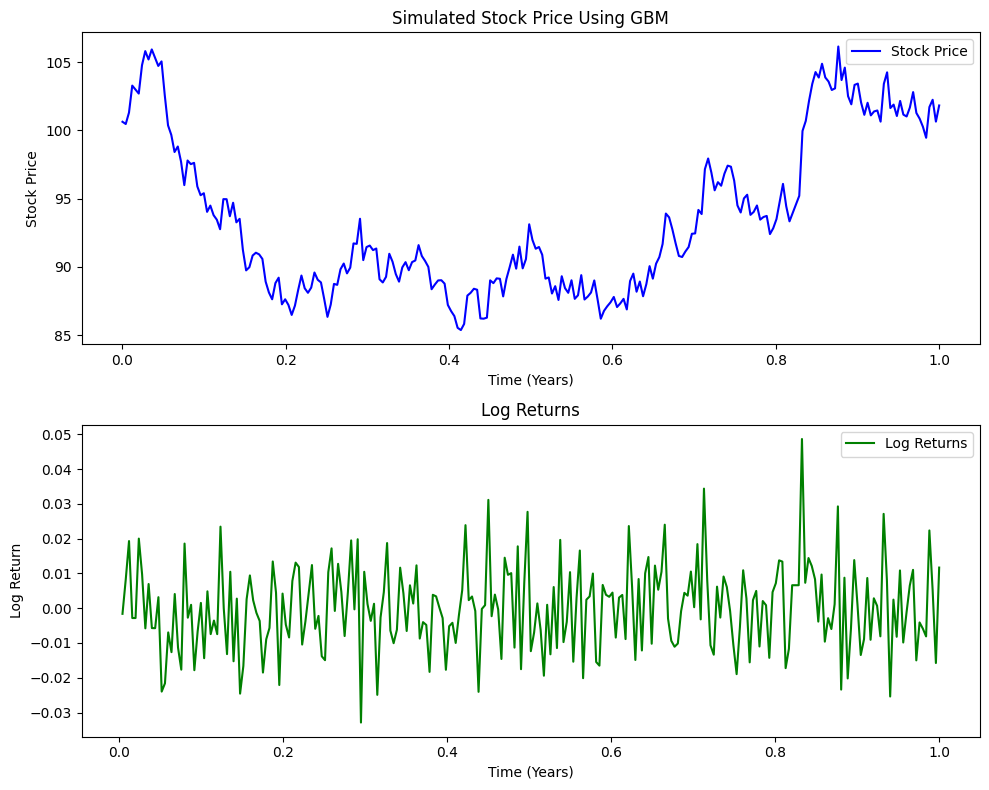

In [6]:
# Plot the stock price and log returns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot simulated stock price
ax1.plot(t, S, label='Stock Price', color='blue')
ax1.set_title('Simulated Stock Price Using GBM')
ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Stock Price')
ax1.legend()

# Plot log returns
ax2.plot(t[1:], log_returns, label='Log Returns', color='green')
ax2.set_title('Log Returns')
ax2.set_xlabel('Time (Years)')
ax2.set_ylabel('Log Return')
ax2.legend()

plt.tight_layout()
plt.show()

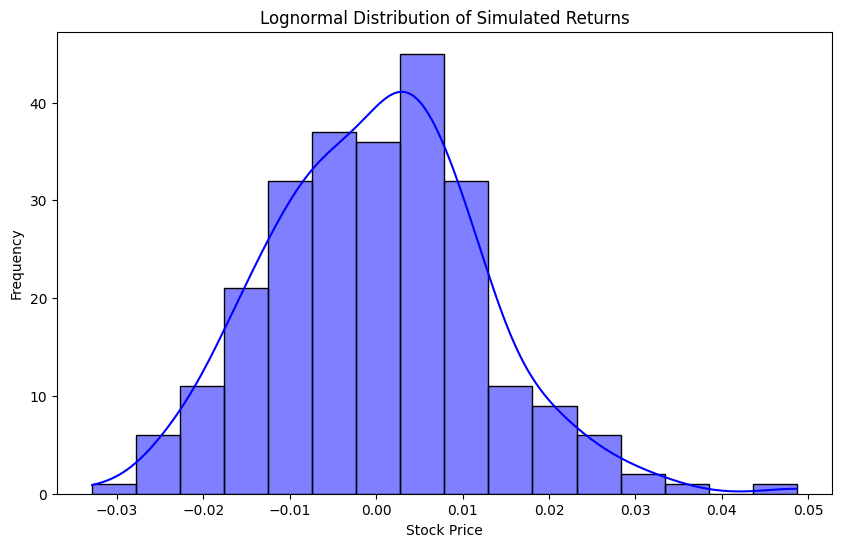

In [13]:
# Plot the lognormal distribution of stock prices
plt.figure(figsize=(10, 6))
sns.histplot(log_returns, kde=True, color='blue')
plt.title('Lognormal Distribution of Simulated Returns')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')

plt.show()

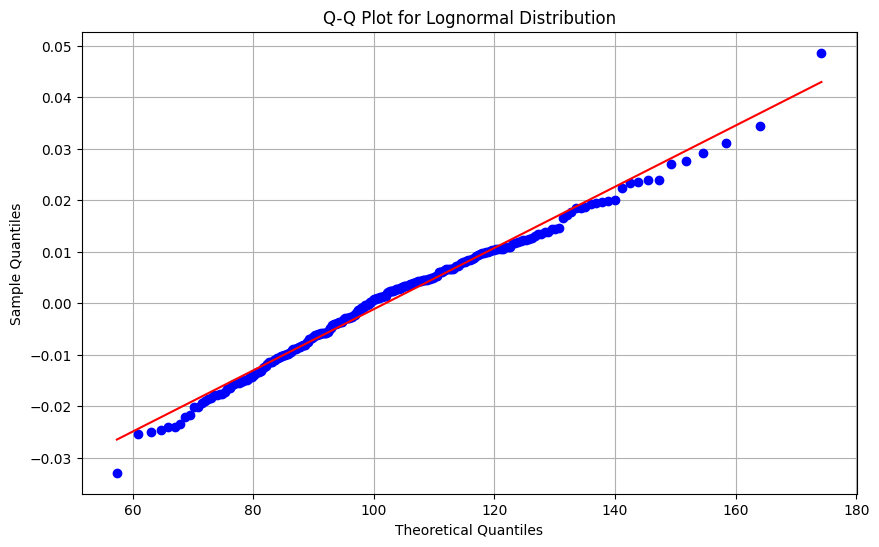

In [14]:
# Q-Q Plot for the lognormal distribution
plt.figure(figsize=(10, 6))
stats.probplot(log_returns, dist="lognorm", sparams=(sigma, 0, S0), plot=plt)
plt.title('Q-Q Plot for Lognormal Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

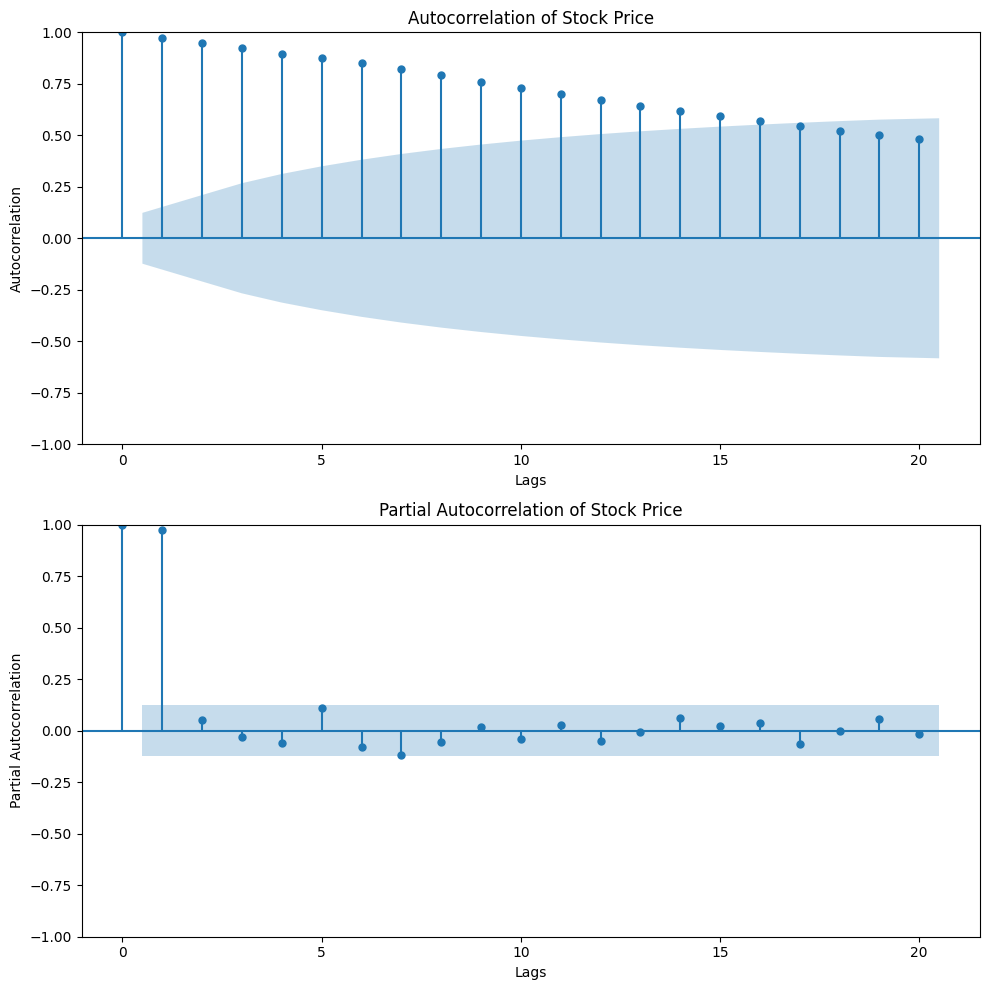

In [12]:
# Autocorrelation and Partial Autocorrelation Plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Autocorrelation Plot
sm.graphics.tsa.plot_acf(S, lags=20, ax=ax1)
ax1.set_title('Autocorrelation of Stock Price')
ax1.set_xlabel('Lags')
ax1.set_ylabel('Autocorrelation')

# Partial Autocorrelation Plot
sm.graphics.tsa.plot_pacf(S, lags=20, ax=ax2)
ax2.set_title('Partial Autocorrelation of Stock Price')
ax2.set_xlabel('Lags')
ax2.set_ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()